В качестве дополнительнных переменных были выбраны: средняя зарплата, население, количество работаспособного населения

## Данные города Минска

In [4]:
minsk_df

,citizens,salary,in,out,count_of_workers
year,,,,,
2013,1903287,636.7503,44663,29331,1094500
2014,1927950,773.1043,44419,33713,1089300
2015,1948281,887.2477,53220,37247,1080000
2016,1974857,985.8000,49469,39665,1065900
2017,1992738,1125.5000,50517,45180,1067600
2018,2001196,1329.6000,55048,44794,1066900
2019,2012896,1495.2000,62562,53305,1087700


## Данные Минской Области


In [7]:
minsk_district_df

,citizens,salary,in,out,count_of_workers
year,,,,,
2013,1417004,496.1523,39989,36851,697616
2014,1421236,598.7224,46034,39312,697500
2015,1431088,666.7886,54279,43913,695298
2016,1446125,713.3000,47623,40609,691200
2017,1456101,812.9000,47428,40391,683700
2018,1463137,1079.6000,47497,40744,686253
2019,1469253,1242.3250,50079,40462,685201


## График количества убывших из города Минска

<AxesSubplot:xlabel='year'>

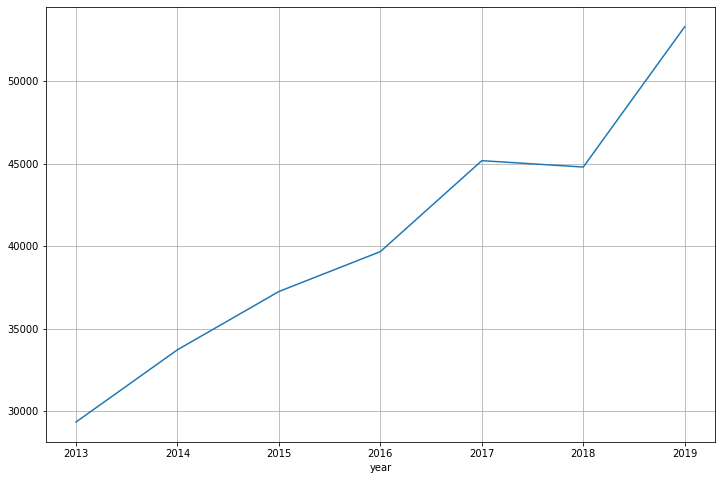

## График количества прибывших в город Минск


<AxesSubplot:xlabel='year'>

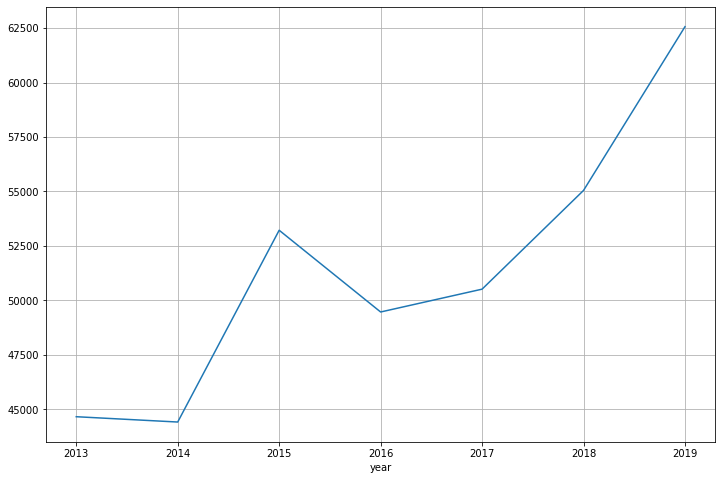

## График количества убывших из Минской Области

<AxesSubplot:xlabel='year'>

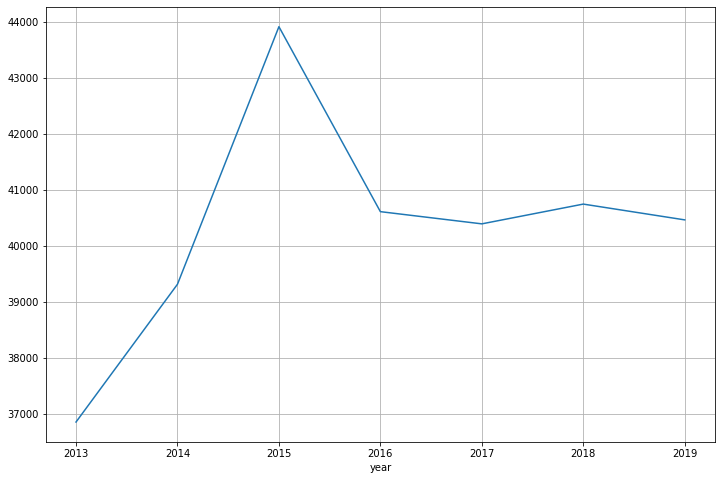

## График количества прибывших в Минскую область


<AxesSubplot:xlabel='year'>

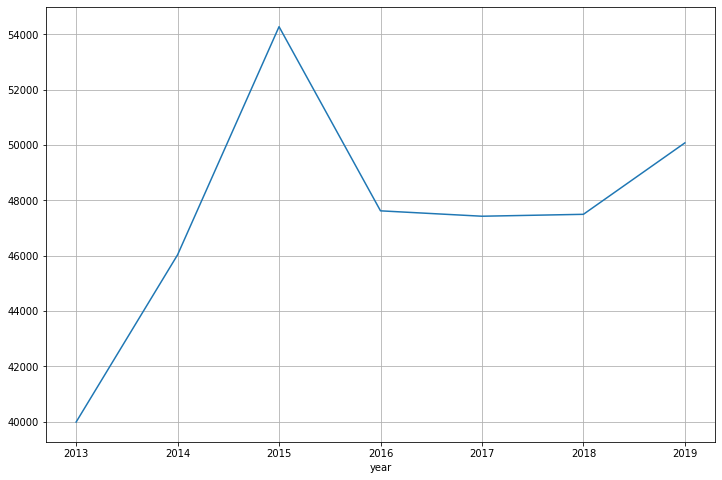

# Построим модели для города Минска

In [14]:
minsk_df

,citizens,salary,in,out,count_of_workers
year,,,,,
2013,1903287,636.7503,44663,29331,1094500
2014,1927950,773.1043,44419,33713,1089300
2015,1948281,887.2477,53220,37247,1080000
2016,1974857,985.8000,49469,39665,1065900
2017,1992738,1125.5000,50517,45180,1067600
2018,2001196,1329.6000,55048,44794,1066900
2019,2012896,1495.2000,62562,53305,1087700


## Пассивный прогноз: возьмем в качестве значений признаков среднее значение за предыдущие 5 лет(для года x среднее между x-1,x-2,...,x-5)

In [15]:
salary_for_preds = minsk_df.salary.to_list()
citizens_for_preds = minsk_df.citizens.to_list()
count_of_workers_for_preds = minsk_df.count_of_workers.to_list()

In [16]:
# расчет средних показателей для каждого фактара для предсказания на следующие 5 лет
for _ in range(5):
    salary_for_preds.append(np.mean(salary_for_preds[-5:]))
    citizens_for_preds.append(np.mean(citizens_for_preds[-5:]).astype('int64'))
    count_of_workers_for_preds.append(np.mean(count_of_workers_for_preds[-5:]).astype('int64'))

In [17]:
salary_for_preds = salary_for_preds[-5:]
citizens_for_preds = citizens_for_preds[-5:]
count_of_workers_for_preds = count_of_workers_for_preds[-5:]

## Оптимистичный прогноз: посчитаем признаки по следующей формуле - текущее значение = предыдущее значение*процент роста значения за последние 3 года

#### процент роста: x_t - значение в год t; тогда процент роста за последние три года = (x_t/x_t-1 + x_t/x_t-2 + 1)/3
#### цикл for проходит 5 кругов, на первом круге рассчитывается значения для 2020 года, на втором круге: 2021  и т.д. , до 5 круга, где рассчитывается для 2024 года

In [19]:
salary_for_preds = minsk_df.salary.to_list()
citizens_for_preds = minsk_df.citizens.to_list()
count_of_workers_for_preds = minsk_df.count_of_workers.to_list()
for _ in range(5):
    salary_for_preds.append((salary_for_preds[-1]/salary_for_preds[-2]+
                             salary_for_preds[-1]/salary_for_preds[-3]+1)/3*salary_for_preds[-1])
    citizens_for_preds.append(int((citizens_for_preds[-1]/citizens_for_preds[-2]+
                             citizens_for_preds[-1]/citizens_for_preds[-3]+1)/3*citizens_for_preds[-1]))
    count_of_workers_for_preds.append(int((count_of_workers_for_preds[-1]/count_of_workers_for_preds[-2]+
                             count_of_workers_for_preds[-1]/count_of_workers_for_preds[-3]+1)/3*count_of_workers_for_preds[-1]))

salary_for_preds = salary_for_preds[-5:]
citizens_for_preds = citizens_for_preds[-5:]
count_of_workers_for_preds = count_of_workers_for_preds[-5:]


#### таким образом мы рассчитали  среднюю зарплату , население и количество трудоспособного населения на 2020-2024 года в оптимистичных реалиях

## Регрессия для количества прибывших

### Обучим регрессию

In [24]:
lin_reg = LinearRegression().fit(X,y)

In [25]:
print(f"Итоговая формула : y={round(lin_reg.coef_[0],4)}x1 + {round(lin_reg.coef_[1],4)}x2 + {round(lin_reg.coef_[2],4)}x3 +({lin_reg.intercept_})")
print("Где x1 - количество жителей, x2 - зарплата, x3 - количество трудоспособного населения")

Итоговая формула : y=0.0136x1 + 19.035x2 + 0.1254x3 +(-130194.87241525916)
Где x1 - количество жителей, x2 - зарплата, x3 - количество трудоспособного населения


### Коэфиценты перед x1,x2,x3 и свободный член(intercept)  были получены при помощи метода наименьших квадратов. Основываясь на итоговой формуле, можно сказать, что основным фактором влияния на количество прибывших в Минск является уровень средней зарплаты

In [26]:
preds_for_old = lin_reg.predict(X).astype("int64")

### В предыдущем пункте мы предсказали регрессией исходные данные для проверки результатов обучения

In [27]:
r2 = r2_score(preds_for_old,y.to_numpy())

print(f"r2 score of a regression is: {r2}")


r2 score of a regression is: 0.8337112326904359
Adjusted r2 score of a regression is: 0.6674224653808718


### даннные значения r2(r2 > 0.5) указывают на то, что мы можем считать регрессию достоверной

### Отобразим графически сравнение данных реальных и предсказанных регрессией

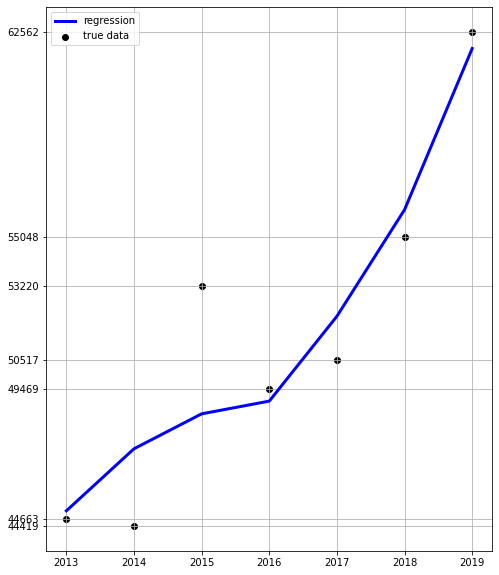

### Сделаем предсказания: оптимистичные на 2020-2024

In [29]:
predictions = (lin_reg.predict(X_for_prediction_opt)).astype("int64")

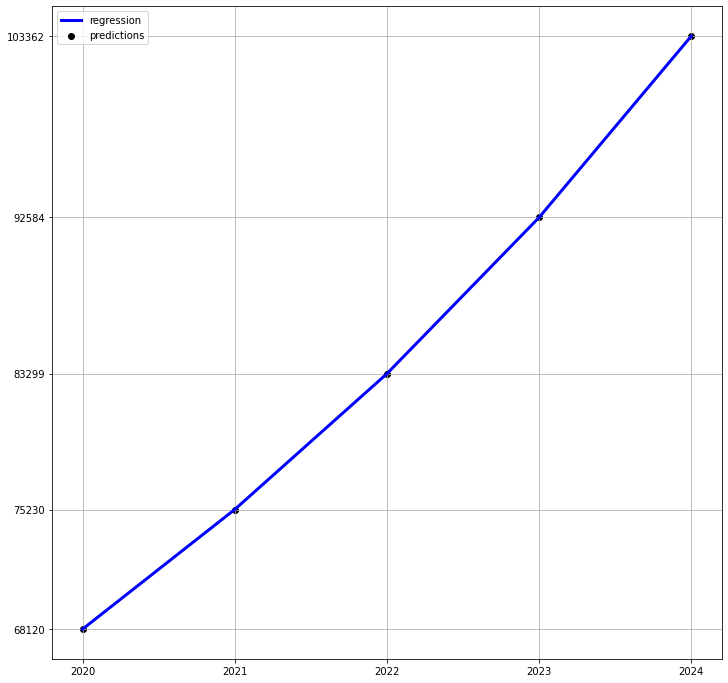

In [31]:
# cохраним результат
results1.to_csv("MinskInCitizensPredictionOpt.csv")

### Сделаем предсказания: пассивные

In [32]:
predictions = lin_reg.predict(X_for_prediction_passive.astype("int64"))

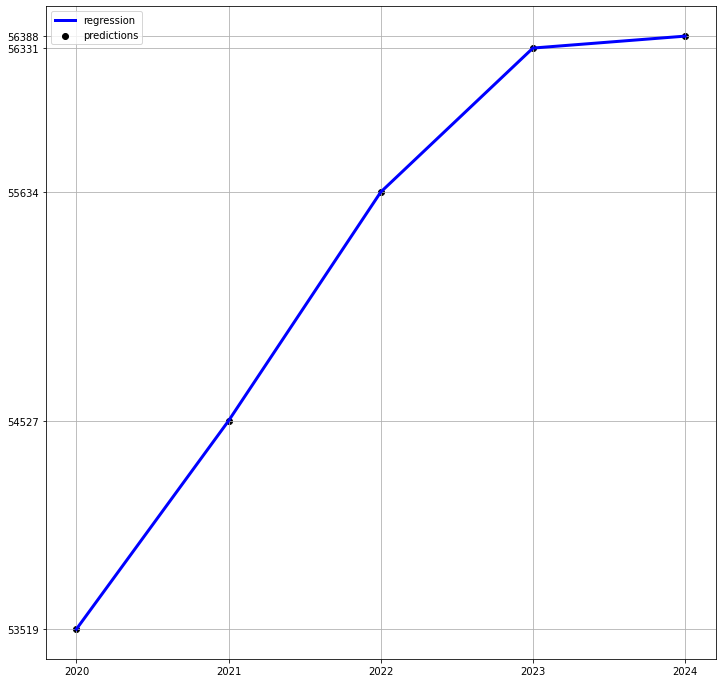

In [34]:
# cохраним результат
results2.to_csv("MinskInCitizensPredictionPassive.csv")

## Проведем аналогичные действия для числа убывших из Минска

In [35]:
y = minsk_df['out']
lin_reg = LinearRegression().fit(X,y)

In [36]:
print(f"Итоговая формула : y={round(lin_reg.coef_[0],4)}x1 + ({round(lin_reg.coef_[1],4)}x2) + {round(lin_reg.coef_[2],4)}x3 +({lin_reg.intercept_})")
print("Где x1 - количество жителей, x2 - зарплата, x3 - количество трудоспособного населения")

Итоговая формула : y=0.3466x1 + (-13.5561x2) + 0.3217x3 +(-974031.4022996799)
Где x1 - количество жителей, x2 - зарплата, x3 - количество трудоспособного населения


### основываясь на итоговой формуле, можно сказать, что основным фактором влияния на количество убывших из Минска является уровень средней зарплаты

In [37]:
preds_for_old = lin_reg.predict(X).astype("int64")

In [38]:
r2 = r2_score(preds_for_old,y.to_numpy())

print(f"r2 score of a regression is: {r2}")


r2 score of a regression is: 0.9979741986164019
Adjusted r2 score of a regression is: 0.9959483972328038


### даннные значения r2 указывают на то, что мы можем считать регрессию достоверной


### посмотрим как она описывает наши исходные данные

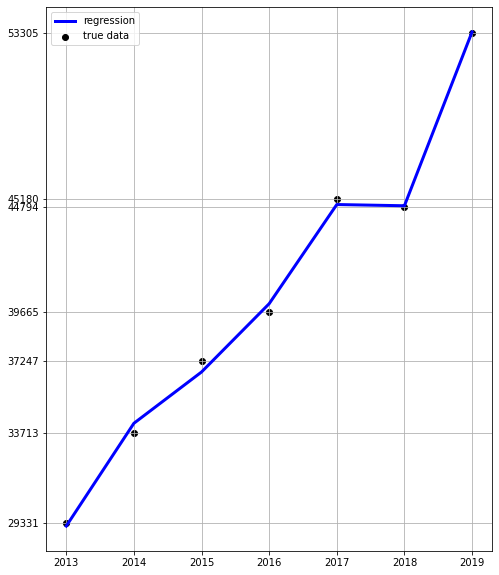

### Сделаем предсказания: оптимистичные

In [40]:
predictions = lin_reg.predict(X_for_prediction_opt).astype("int64")

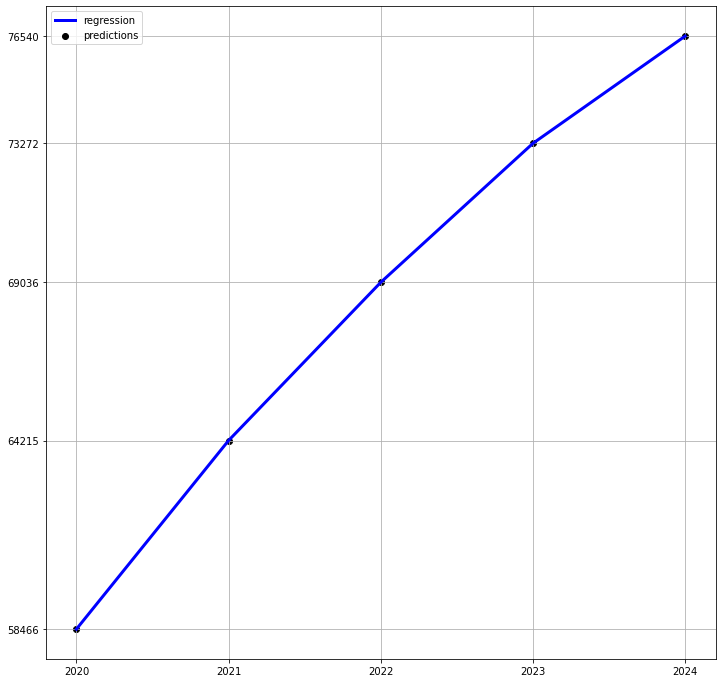

In [42]:
# cохраним результат
results2.to_csv("MinskOutCitizensPredictionOpt.csv")

### Сделаем предсказания: пассивные

In [43]:
predictions = lin_reg.predict(X_for_prediction_passive).astype("int64")

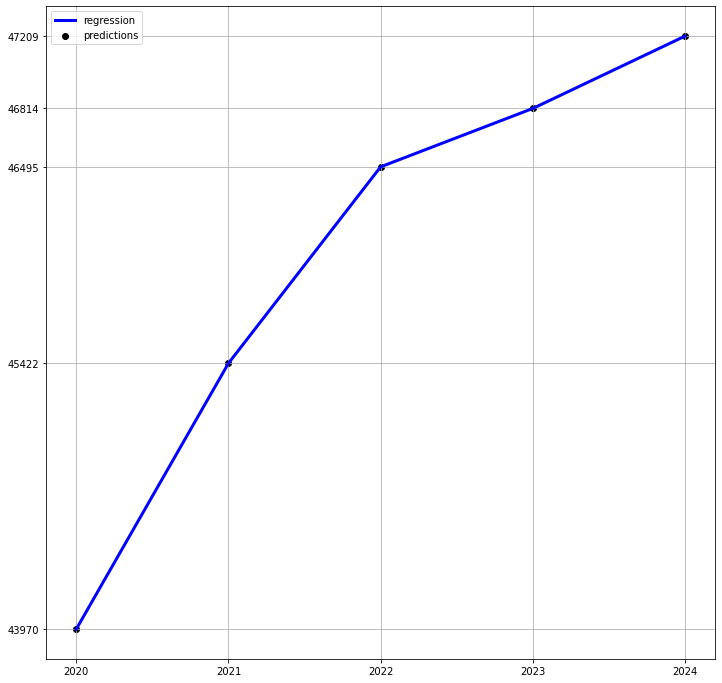

In [45]:
# cохраним результат
results2.to_csv("MinskOutCitizensPredictionPassive.csv")

# Построим модели для Минской области: все проведем абсолютно аналогинчо, комментарии опустим

In [46]:
minsk_district_df

,citizens,salary,in,out,count_of_workers
year,,,,,
2013,1417004,496.1523,39989,36851,697616
2014,1421236,598.7224,46034,39312,697500
2015,1431088,666.7886,54279,43913,695298
2016,1446125,713.3000,47623,40609,691200
2017,1456101,812.9000,47428,40391,683700
2018,1463137,1079.6000,47497,40744,686253
2019,1469253,1242.3250,50079,40462,685201


In [47]:
# пассивный
salary_for_preds = minsk_district_df.salary.to_list()
citizens_for_preds = minsk_district_df.citizens.to_list()
count_of_workers_for_preds = minsk_district_df.count_of_workers.to_list()
for _ in range(5):
    salary_for_preds.append(np.mean(salary_for_preds[-5:]))
    citizens_for_preds.append(np.mean(citizens_for_preds[-5:]).astype('int64'))
    count_of_workers_for_preds.append(np.mean(count_of_workers_for_preds[-5:]).astype('int64'))

salary_for_preds = salary_for_preds[-5:]
citizens_for_preds = citizens_for_preds[-5:]
count_of_workers_for_preds = count_of_workers_for_preds[-5:]

In [48]:
# оптимистичный
salary_for_preds = minsk_district_df.salary.to_list()
citizens_for_preds = minsk_district_df.citizens.to_list()
count_of_workers_for_preds = minsk_district_df.count_of_workers.to_list()
for _ in range(5):
    salary_for_preds.append((salary_for_preds[-1]/salary_for_preds[-2]+
                             salary_for_preds[-1]/salary_for_preds[-3]+1)/3*salary_for_preds[-1])
    citizens_for_preds.append(int((citizens_for_preds[-1]/citizens_for_preds[-2]+
                             citizens_for_preds[-1]/citizens_for_preds[-3]+1)/3*citizens_for_preds[-1]))
    count_of_workers_for_preds.append(int((count_of_workers_for_preds[-1]/count_of_workers_for_preds[-2]+
                             count_of_workers_for_preds[-1]/count_of_workers_for_preds[-3]+1)/3*count_of_workers_for_preds[-1]))

salary_for_preds = salary_for_preds[-5:]
citizens_for_preds = citizens_for_preds[-5:]
count_of_workers_for_preds = count_of_workers_for_preds[-5:]


In [50]:
X.columns

Index(['citizens', 'salary', 'count_of_workers'], dtype='object')

## Регрессия для количества прибывших

In [51]:
y = minsk_district_df['in']
lin_reg = LinearRegression().fit(X,y)
print(f"Итоговая формула : y={round(lin_reg.coef_[0],4)}x1 + {round(lin_reg.coef_[1],4)}x2 + {round(lin_reg.coef_[2],4)}x3 +({lin_reg.intercept_})")
print("Где x1 - количество жителей, x2 - зарплата, x3 - количество трудоспособного населения")

Итоговая формула : y=0.4552x1 + -7.6026x2 + 1.0165x3 +(-1305696.3207700679)
Где x1 - количество жителей, x2 - зарплата, x3 - количество трудоспособного населения


In [52]:
preds_for_old = lin_reg.predict(X).astype("int64")
r2 = r2_score(preds_for_old,y.to_numpy())

print(f"r2 score of a regression is: {r2}")


r2 score of a regression is: -1.6329590984219364
Adjusted r2 score of a regression is: -4.265918196843873


### даннные значения r2(<0.5) указывают на то, что мы НЕ можем считать регрессию достоверной

### посмотрим как она описывает наши исходные данные

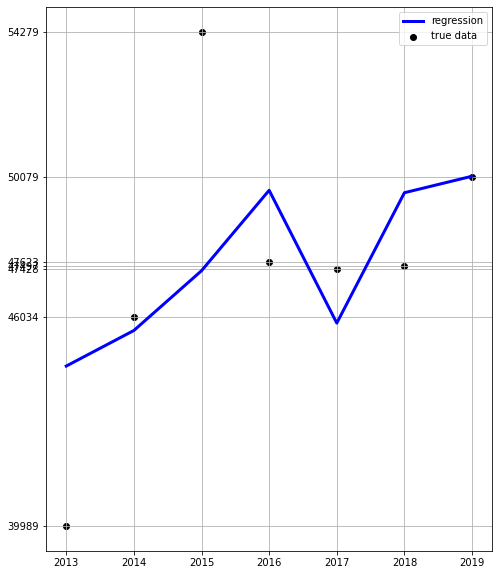

## Видно, что сильной помехой явлется 2015 год, обучим без него

In [54]:
X_wo_2015 = X.drop(2015)
y = minsk_district_df['in']
y_wo_2015 = y.drop(2015)

In [55]:
lin_reg = LinearRegression().fit(X_wo_2015,y_wo_2015)
print(f"Итоговая формула : y={round(lin_reg.coef_[0],4)}x1 + {round(lin_reg.coef_[1],4)}x2 + {round(lin_reg.coef_[2],4)}x3 +({lin_reg.intercept_})")
print("Где x1 - количество жителей, x2 - зарплата, x3 - количество трудоспособного населения")

Итоговая формула : y=0.274x1 + -2.9541x2 + 0.401x3 +(-623916.8414954441)
Где x1 - количество жителей, x2 - зарплата, x3 - количество трудоспособного населения


In [56]:
preds_for_old = lin_reg.predict(X_wo_2015).astype("int64")
r2 = r2_score(preds_for_old,y_wo_2015.to_numpy())

print(f"r2 score of a regression is: {r2}")


r2 score of a regression is: 0.6098701067035193
Adjusted r2 score of a regression is: 0.024675266758798164


### даннные значения r2 указывают на то, что регрессия может быть достоверной, однако с малыми надеждами

### основываясь на итоговой формуле, можно сказать, что основным фактором влияния на количество прибывших в Минскую область является уровень средней зарплаты

### посмотрим как она описывает наши исходные данные

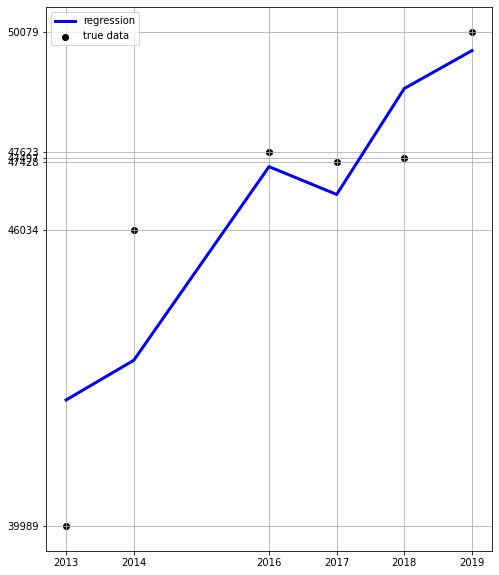

### Сделаем предсказания: оптимистичные


In [58]:
predictions = lin_reg.predict(X_for_prediction_opt.astype("int64"))

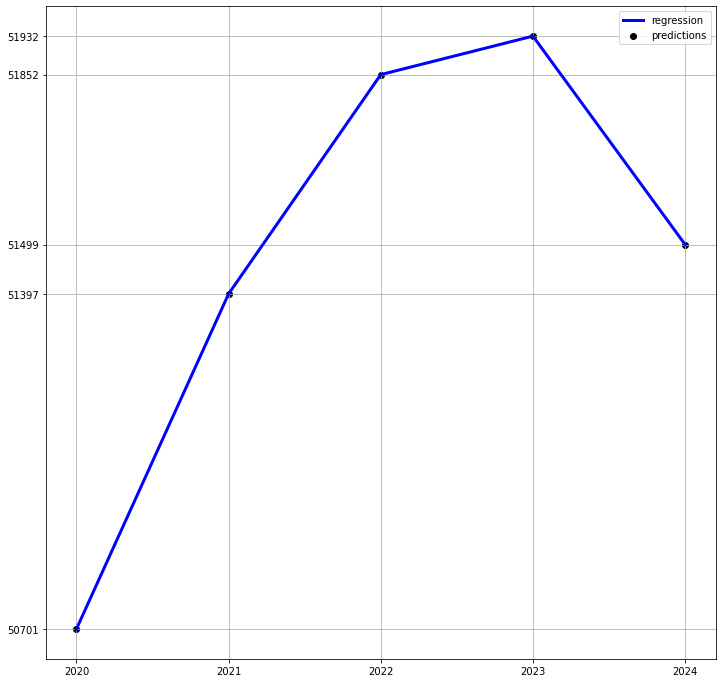

In [60]:
# cохраним результат
results1.to_csv("MinskDistrictInCitizensPredictionOpt.csv")

### Сделаем предсказания: пассивные

In [61]:
predictions = lin_reg.predict(X_for_prediction_passive.astype("int64"))

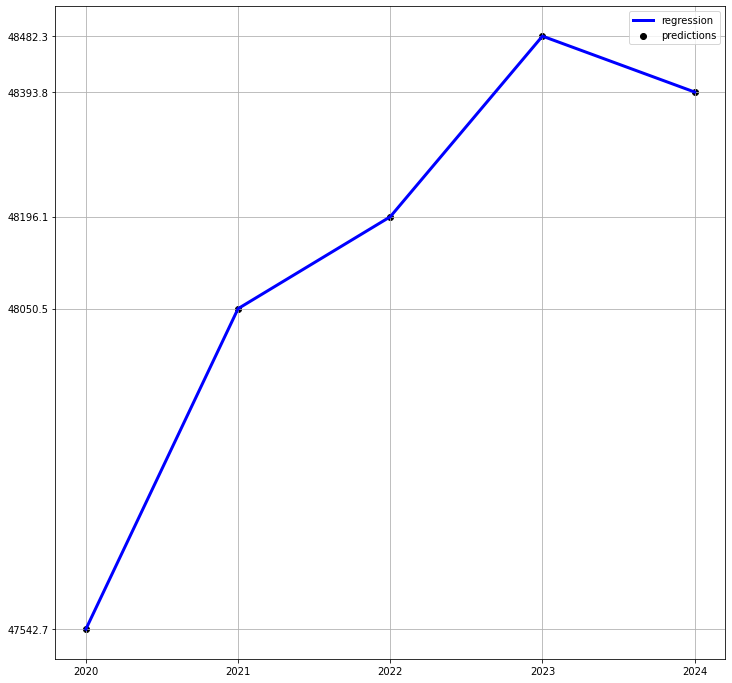

In [63]:
# cохраним результат
results2.to_csv("MinskDistrictInCitizensPredictionPassive.csv")

## Проведем аналогичные действия для числа убывших из Минской области

In [64]:
X_wo_2015 = X.drop(2015)
y = minsk_district_df['out']
y_wo_2015 = y.drop(2015)

In [65]:
lin_reg = LinearRegression().fit(X_wo_2015,y_wo_2015)
print(f"Итоговая формула : y={round(lin_reg.coef_[0],4)}x1 + {round(lin_reg.coef_[1],4)}x2 + {round(lin_reg.coef_[2],4)}x3 +({lin_reg.intercept_})")
print("Где x1 - количество жителей, x2 - зарплата, x3 - количество трудоспособного населения")

Итоговая формула : y=0.1831x1 + -5.1405x2 + 0.237x3 +(-384271.3617396544)
Где x1 - количество жителей, x2 - зарплата, x3 - количество трудоспособного населения


In [66]:
preds_for_old = lin_reg.predict(X_wo_2015).astype("int64")

In [67]:
preds_for_old = lin_reg.predict(X_wo_2015).astype("int64")
r2 = r2_score(preds_for_old,y_wo_2015.to_numpy())

print(f"r2 score of a regression is: {r2}")


r2 score of a regression is: 0.69371245659102
Adjusted r2 score of a regression is: 0.23428114147754997


### даннные значения r2 указывают на то, что регрессия может быть достоверной, однако с малыми надеждами

### основываясь на итоговой формуле, можно сказать, что основным фактором влияния на количество убывших из Минской области является уровень средней зарплаты

### посмотрим как она описывает наши исходные данные

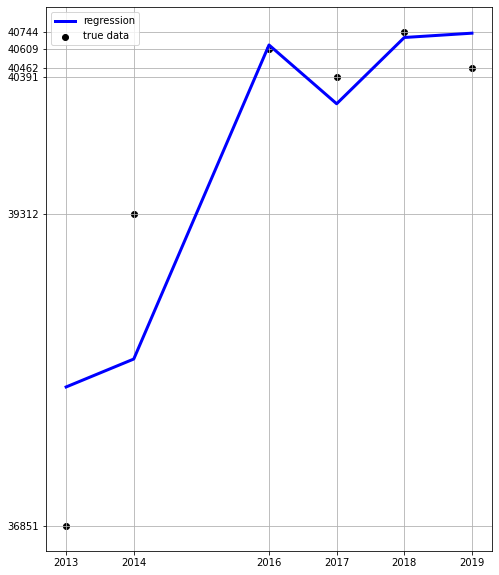

In [69]:
### Сделаем предсказания: оптимистичные


In [70]:
predictions = lin_reg.predict(X_for_prediction_opt.astype("int64"))

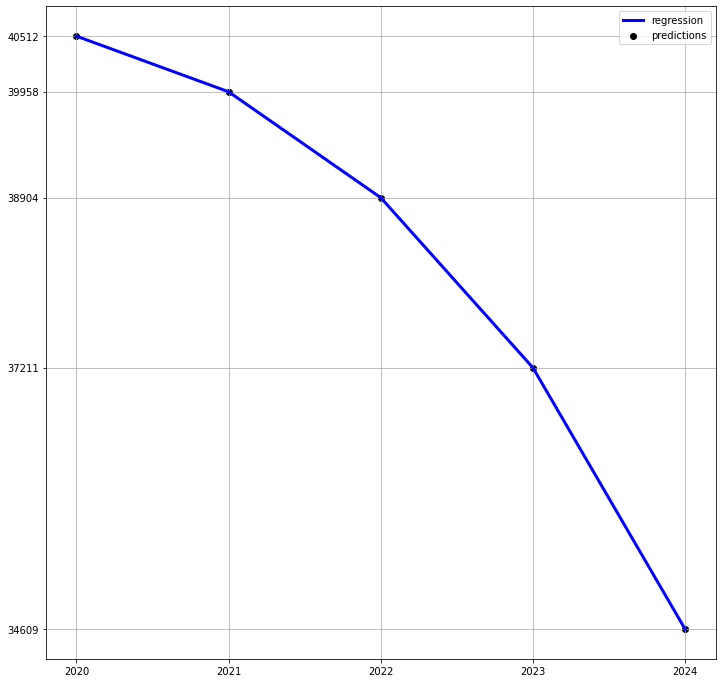

In [72]:
# cохраним результат
results1.to_csv("MinskDistrictOutCitizensPredictionOpt.csv")

### Сделаем предсказания: пассивные

In [73]:
predictions = (lin_reg.predict(X_for_prediction_passive)).astype("int64")

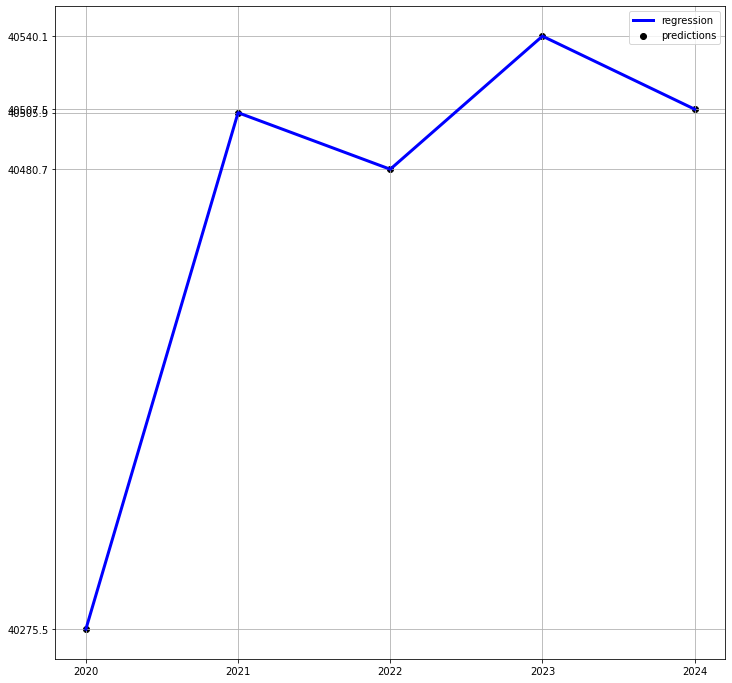

In [75]:
# cохраним результат
results2= pd.DataFrame({
    'year':X_for_prediction_passive.index.to_list(),
    'in': predictions
})
results2.to_csv("MinskDistrictOutCitizensPredictionPassive.csv")